## Importando Dataset - Campeonato Brasileiro

In [1]:
import matplotlib as matplotlib
import pandas as pd
import sklearn as sklearn

csv_path = '.\dataset\campeonato-brasileiro-full.csv'

df = pd.read_csv(csv_path, delimiter=';')
df

,ID,Rodada,Data,Horário,Dia,Mandante,Visitante,Vencedor,Arena,Mandante Placar,Visitante Placar,Estado Mandante,Estado Visitante,Estado Vencedor
0,1,1,2000-07-29,16h00,Sábado,Fluminense,Bahia,Fluminense,Maracanã,2.0,0.0,RJ,BA,RJ
1,2,1,2000-07-29,16h00,Sábado,Vasco,Sport,Sport,São Januário,0.0,2.0,RJ,PE,PE
2,3,1,2000-07-29,16h00,Sábado,Vitória,Palmeiras,Vitória,Barradão,4.0,1.0,ES,SP,ES
3,4,1,2000-07-30,17h00,Domingo,Botafogo-RJ,Atlético-MG,-,Caio Martins,0.0,0.0,RJ,MG,-
4,5,1,2000-07-30,18h30,Domingo,Juventude,Flamengo,-,Alfredo Jaconi,1.0,1.0,RS,RJ,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8435,8436,12,2021-07-18,16:00,Domingo,atlético-go,palmeiras,palmeiras,Antônio Accioly,0.0,3.0,GO,SP,SP
8436,8437,12,2021-07-18,18:15,Domingo,bahia,flamengo,flamengo,Pituaçu,0.0,5.0,BA,RJ,RJ
8437,8438,12,2021-07-18,20:30,Domingo,internacional,juventude,internacional,Beira-Rio,1.0,0.0,RS,RS,RS
8438,8439,12,2021-07-18,20:30,Domingo,bragantino,santos,-,Nabi Abi Chedid,2.0,2.0,SP,SP,-


## Capturando informações gerais das colunas

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8440 entries, 0 to 8439
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8440 non-null   int64  
 1   Rodada            8440 non-null   object 
 2   Data              8436 non-null   object 
 3   Horário           8079 non-null   object 
 4   Dia               8436 non-null   object 
 5   Mandante          8440 non-null   object 
 6   Visitante         8440 non-null   object 
 7   Vencedor          8440 non-null   object 
 8   Arena             8436 non-null   object 
 9   Mandante Placar   8436 non-null   float64
 10  Visitante Placar  8436 non-null   float64
 11  Estado Mandante   8440 non-null   object 
 12  Estado Visitante  8440 non-null   object 
 13  Estado Vencedor   8440 non-null   object 
dtypes: float64(2), int64(1), object(11)
memory usage: 923.2+ KB


## Listando os 5 primeiros registros

In [3]:
df.head(5)

,ID,Rodada,Data,Horário,Dia,Mandante,Visitante,Vencedor,Arena,Mandante Placar,Visitante Placar,Estado Mandante,Estado Visitante,Estado Vencedor
0,1,1,2000-07-29,16h00,Sábado,Fluminense,Bahia,Fluminense,Maracanã,2.0,0.0,RJ,BA,RJ
1,2,1,2000-07-29,16h00,Sábado,Vasco,Sport,Sport,São Januário,0.0,2.0,RJ,PE,PE
2,3,1,2000-07-29,16h00,Sábado,Vitória,Palmeiras,Vitória,Barradão,4.0,1.0,ES,SP,ES
3,4,1,2000-07-30,17h00,Domingo,Botafogo-RJ,Atlético-MG,-,Caio Martins,0.0,0.0,RJ,MG,-
4,5,1,2000-07-30,18h30,Domingo,Juventude,Flamengo,-,Alfredo Jaconi,1.0,1.0,RS,RJ,-


## Tratando dados inválidos

In [4]:
from unicodedata import normalize

def trataString(value):
    return normalize('NFKD', str(value)).encode('ASCII', 'ignore').decode('ASCII').upper()

df['Mandante'] = df['Mandante'].apply(trataString)
df['Visitante'] = df['Visitante'].apply(trataString)
df['Dia'] = df['Dia'].apply(trataString)
df['Vencedor'] = df['Vencedor'].apply(trataString)
df['Arena'] = df['Arena'].apply(trataString)

## Implemente pelo menos um filtro

## Ordenando o Dataset pelo maiores pontuadores independente de temporadas

In [5]:
df['Pontos Mandante'] = 0
df['Pontos Visitante'] = 0

df.loc[ df['Vencedor'] == df['Mandante'], 'Pontos Mandante' ] = 3
df.loc[ df['Vencedor'] == df['Visitante'], 'Pontos Visitante' ] = 3
df.loc[ df['Vencedor'] == '-', 'Pontos Mandante' ] = 1
df.loc[ df['Vencedor'] == '-', 'Pontos Visitante' ] = 1

times = pd.Series(df['Mandante'].unique(), name='Times')
tg = pd.DataFrame(times)
tg['Pontos'] = 0

mandante = df.groupby('Mandante')['Pontos Mandante'].sum()
visitante = df.groupby('Visitante')['Pontos Visitante'].sum()
nova = pd.DataFrame(mandante)
nova_2 = pd.DataFrame(visitante)

for index, i in nova.iterrows():
    tg.loc[ tg['Times'] == index, 'Pontos' ] += i['Pontos Mandante']

for index, i in nova_2.iterrows():
    tg.loc[ tg['Times'] == index, 'Pontos' ] += i['Pontos Visitante']

tg = tg.sort_values(by="Pontos", ascending=False).reset_index()
tg[['Times', 'Pontos']]

,Times,Pontos
0,SAO PAULO,1318
1,SANTOS,1236
2,FLAMENGO,1192
3,INTERNACIONAL,1172
4,GREMIO,1169
5,FLUMINENSE,1156
6,CRUZEIRO,1152
7,CORINTHIANS,1151
8,ATLETICO-MG,1117
9,ATHLETICO-PR,1115


## Ordenando o Dataset pelas maiores goleadas

In [6]:
df['Diferenca Gols'] = abs(df['Mandante Placar'] - df['Visitante Placar'])

# dropando valores nulos, visto que se não houve o jogo, muito provavelmente foi remarcado e está em outro registro
df = df.dropna(subset=['Diferenca Gols'])

df[['Mandante', 'Visitante', 'Vencedor', 'Diferenca Gols']].sort_values(by=['Diferenca Gols'], ascending=False)

,Mandante,Visitante,Vencedor,Diferenca Gols
1600,BAHIA,CRUZEIRO,CRUZEIRO,7.0
1122,GOIAS,JUVENTUDE,GOIAS,7.0
1992,SAO PAULO,PAYSANDU,SAO PAULO,7.0
1528,FIGUEIRENSE,PAYSANDU,FIGUEIRENSE,6.0
1338,FLAMENGO,BAHIA,FLAMENGO,6.0
...,...,...,...,...
2740,FLUMINENSE,SAO CAETANO,-,0.0
3750,SANTOS,NAUTICO,-,0.0
1666,JUVENTUDE,ATLETICO-MG,-,0.0
6932,VASCO,SANTOS,-,0.0


## Exibir as 5 maiores contagens de valores únicos de uma única coluna
#### No caso: Quem são os maiores vencedores em casa

In [7]:
df[ df['Mandante'] == df['Vencedor'] ][['Mandante']].value_counts().head()

Mandante     
SANTOS           233
SAO PAULO        231
GREMIO           223
ATHLETICO-PR     221
INTERNACIONAL    217
dtype: int64

## Implemente pelo menos um filtro

## Utilize, no mínimo, uma função agregada com agrupamento

## Exiba, no mínimo, três plots. Se possível, use um para variáveis quantitativa e outro para variáveis de qualitativas

In [8]:
df.groupby(by=['Estado Mandante'])['Mandante Placar'].sum() + df.groupby(by=['Estado Visitante'])['Visitante Placar'].sum()

Estado Mandante
AL      24.0
BA     521.0
CE     477.0
DF     141.0
ES     615.0
GO    1061.0
MG    2438.0
MT      12.0
PA     229.0
PE     880.0
PR    2147.0
RJ    3969.0
RN      24.0
RS    2426.0
SC    1269.0
SP    6011.0
dtype: float64

In [50]:
import datetime
import plotly.express as px

df['Data2'] = pd.to_datetime(df['Data'])
df['Ano'] = df['Data2'].dt.year
df.drop(columns='Data2', inplace=True)

times = pd.Series(df['Mandante'].unique(), name='Times')
ano = pd.Series(df['Ano'].unique(), name='Ano')
tg = pd.DataFrame(columns=['Time', 'Ano'])

count = 0
for i in times.to_frame().iterrows():
    for y in ano.to_frame().iterrows():
        count += 1
        tg.loc[-1, 'Time'] = i[1][0]
        tg.loc[-1, 'Ano'] = y[1][0]
        tg.index += count


tg['Pontos'] = 0
tg = tg.reset_index()

mandante = df.groupby(['Mandante', 'Ano'])['Pontos Mandante'].sum()
visitante = df.groupby(['Visitante', 'Ano'])['Pontos Visitante'].sum()
nova = pd.DataFrame(mandante)
nova_2 = pd.DataFrame(visitante)

for index, i in nova.iterrows():
    op_1 = tg['Time'] == index[0]
    op_2 = tg['Ano'] == index[1]
    tg.loc[op_1 & op_2, 'Pontos' ] += i['Pontos Mandante']

for index, i in nova_2.iterrows():
    op_1 = tg['Time'] == index[0]
    op_2 = tg['Ano'] == index[1]
    tg.loc[op_1 & op_2, 'Pontos' ] += i['Pontos Visitante']

grafic_3 = tg.groupby('Time')[['Time', 'Pontos']].mean().sort_values('Pontos', ascending=False).head(10)

time_filtro = 'FLAMENGO'
ano_filtro = tg['Ano'] == 2019
pontos_filtro = tg['Pontos'] != 0

# Grafico do time nas temporadas
grafic_1 = tg[ tg['Time'] == time_filtro ]

# grafico da tabela do temporada
grafic_2 = tg[ ano_filtro & pontos_filtro ]

grafic_1 = grafic_1.sort_values(by="Ano").reset_index()
grafic_2 = grafic_2.sort_values(by="Pontos")

grafico = px.line(grafic_1, x='Ano', y='Pontos')
grafico.show()

grafico = px.bar(grafic_2, x='Time', y='Pontos')
grafico.show()

grafico = px.bar(grafic_3, x=grafic_3.index, y='Pontos')
grafico.show()

C:\Users\Cliente\AppData\Local\Temp/ipykernel_2292/568035084.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Cliente\AppData\Local\Temp/ipykernel_2292/568035084.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

e:\pycharm 2021.2.1\projects\campeonato-brasileiro-ia\venv\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

,ID,Rodada,Data,Horário,Dia,Mandante,Visitante,Vencedor,Arena,Mandante Placar,Visitante Placar,Estado Mandante,Estado Visitante,Estado Vencedor,Pontos Mandante,Pontos Visitante,Diferenca Gols,Ano
0,1,1,2000-07-29,16h00,SABADO,FLUMINENSE,BAHIA,FLUMINENSE,MARACANA,2.0,0.0,RJ,BA,RJ,3,0,2.0,2000
1,2,1,2000-07-29,16h00,SABADO,VASCO,SPORT,SPORT,SAO JANUARIO,0.0,2.0,RJ,PE,PE,0,3,2.0,2000
2,3,1,2000-07-29,16h00,SABADO,VITORIA,PALMEIRAS,VITORIA,BARRADAO,4.0,1.0,ES,SP,ES,3,0,3.0,2000
3,4,1,2000-07-30,17h00,DOMINGO,BOTAFOGO-RJ,ATLETICO-MG,-,CAIO MARTINS,0.0,0.0,RJ,MG,-,1,1,0.0,2000
4,5,1,2000-07-30,18h30,DOMINGO,JUVENTUDE,FLAMENGO,-,ALFREDO JACONI,1.0,1.0,RS,RJ,-,1,1,0.0,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8435,8436,12,2021-07-18,16:00,DOMINGO,ATLETICO-GO,PALMEIRAS,PALMEIRAS,ANTONIO ACCIOLY,0.0,3.0,GO,SP,SP,0,3,3.0,2021
8436,8437,12,2021-07-18,18:15,DOMINGO,BAHIA,FLAMENGO,FLAMENGO,PITUACU,0.0,5.0,BA,RJ,RJ,0,3,5.0,2021
8437,8438,12,2021-07-18,20:30,DOMINGO,INTERNACIONAL,JUVENTUDE,INTERNACIONAL,BEIRA-RIO,1.0,0.0,RS,RS,RS,3,0,1.0,2021
8438,8439,12,2021-07-18,20:30,DOMINGO,BRAGANTINO,SANTOS,-,NABI ABI CHEDID,2.0,2.0,SP,SP,-,1,1,0.0,2021


## Prevendo quem ganhará uma partida

#### A partir do time Visitante e do time Mandante o usuário precisará indicar o dia da semana para prever o resultado da partida

In [293]:
# Imports
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn import metrics

# função para coverter os dias para numeros e aceita na biblioteca
def dia_to_number(v):
    if v == 'DOMINGO':
        return 1
    elif v == 'SEGUNDA-FEIRA':
        return 2
    elif v == 'TERÇA-FEIRA':
        return 3
    elif v == 'QUARTA-FEIRA':
        return 4
    elif v == 'QUINTA-FEIRA':
        return 5
    elif v == 'SEXTA-FEIRA':
        return 6
    elif v == 'SABADO':
        return 7

# Definição de mandante e visitante
mandante = 'FLAMENGO'
visitante = 'SANTOS'

# condoções para filtrar o dataset
condition_1 = mandante == df['Mandante']
condition_2 = visitante == df['Visitante']

# filtrando o dataset
filtered = df[ condition_1 & condition_2 ]

# aplicamos as conversões, inclusive da função criada anteriormente
# Mandante  -> 1
# Visitante -> 0
filtered['Dia'] = filtered['Dia'].apply(dia_to_number)

# Separa as entradas e saídas
x = filtered[['Dia']]
y = filtered['Vencedor']

# Excutamos o treino via biblioteca
X_treino, X_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.2)

# Montamos a classificação
arvore = tree.DecisionTreeClassifier()
classificador = arvore.fit(X_treino, y_treino)

caracteristicas = list(x.columns)

# Passamos o dia da semana do jogo
example_domingo = [1]
example_segunda = [2]
example_terca = [3]
example_quarta = [4]
example_quinta = [5]
example_sexta = [6]
example_sabado = [7]

entrada = [example_domingo, example_segunda, example_terca,
            example_quarta, example_quinta, example_sexta, example_sabado]
previsao = classificador.predict(entrada)

y_previsao = classificador.predict(X_teste)

print("Previsão: " + previsao )
print("Precisão:", metrics.accuracy_score(y_teste, y_previsao))

['Previsão: FLAMENGO' 'Previsão: FLAMENGO' 'Previsão: -' 'Previsão: -'
 'Previsão: FLAMENGO' 'Previsão: FLAMENGO' 'Previsão: FLAMENGO']
Precisão: 0.5


C:\Users\Cliente\AppData\Local\Temp/ipykernel_2292/271389167.py:38: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

e:\pycharm 2021.2.1\projects\campeonato-brasileiro-ia\venv\lib\site-packages\sklearn\base.py:445: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



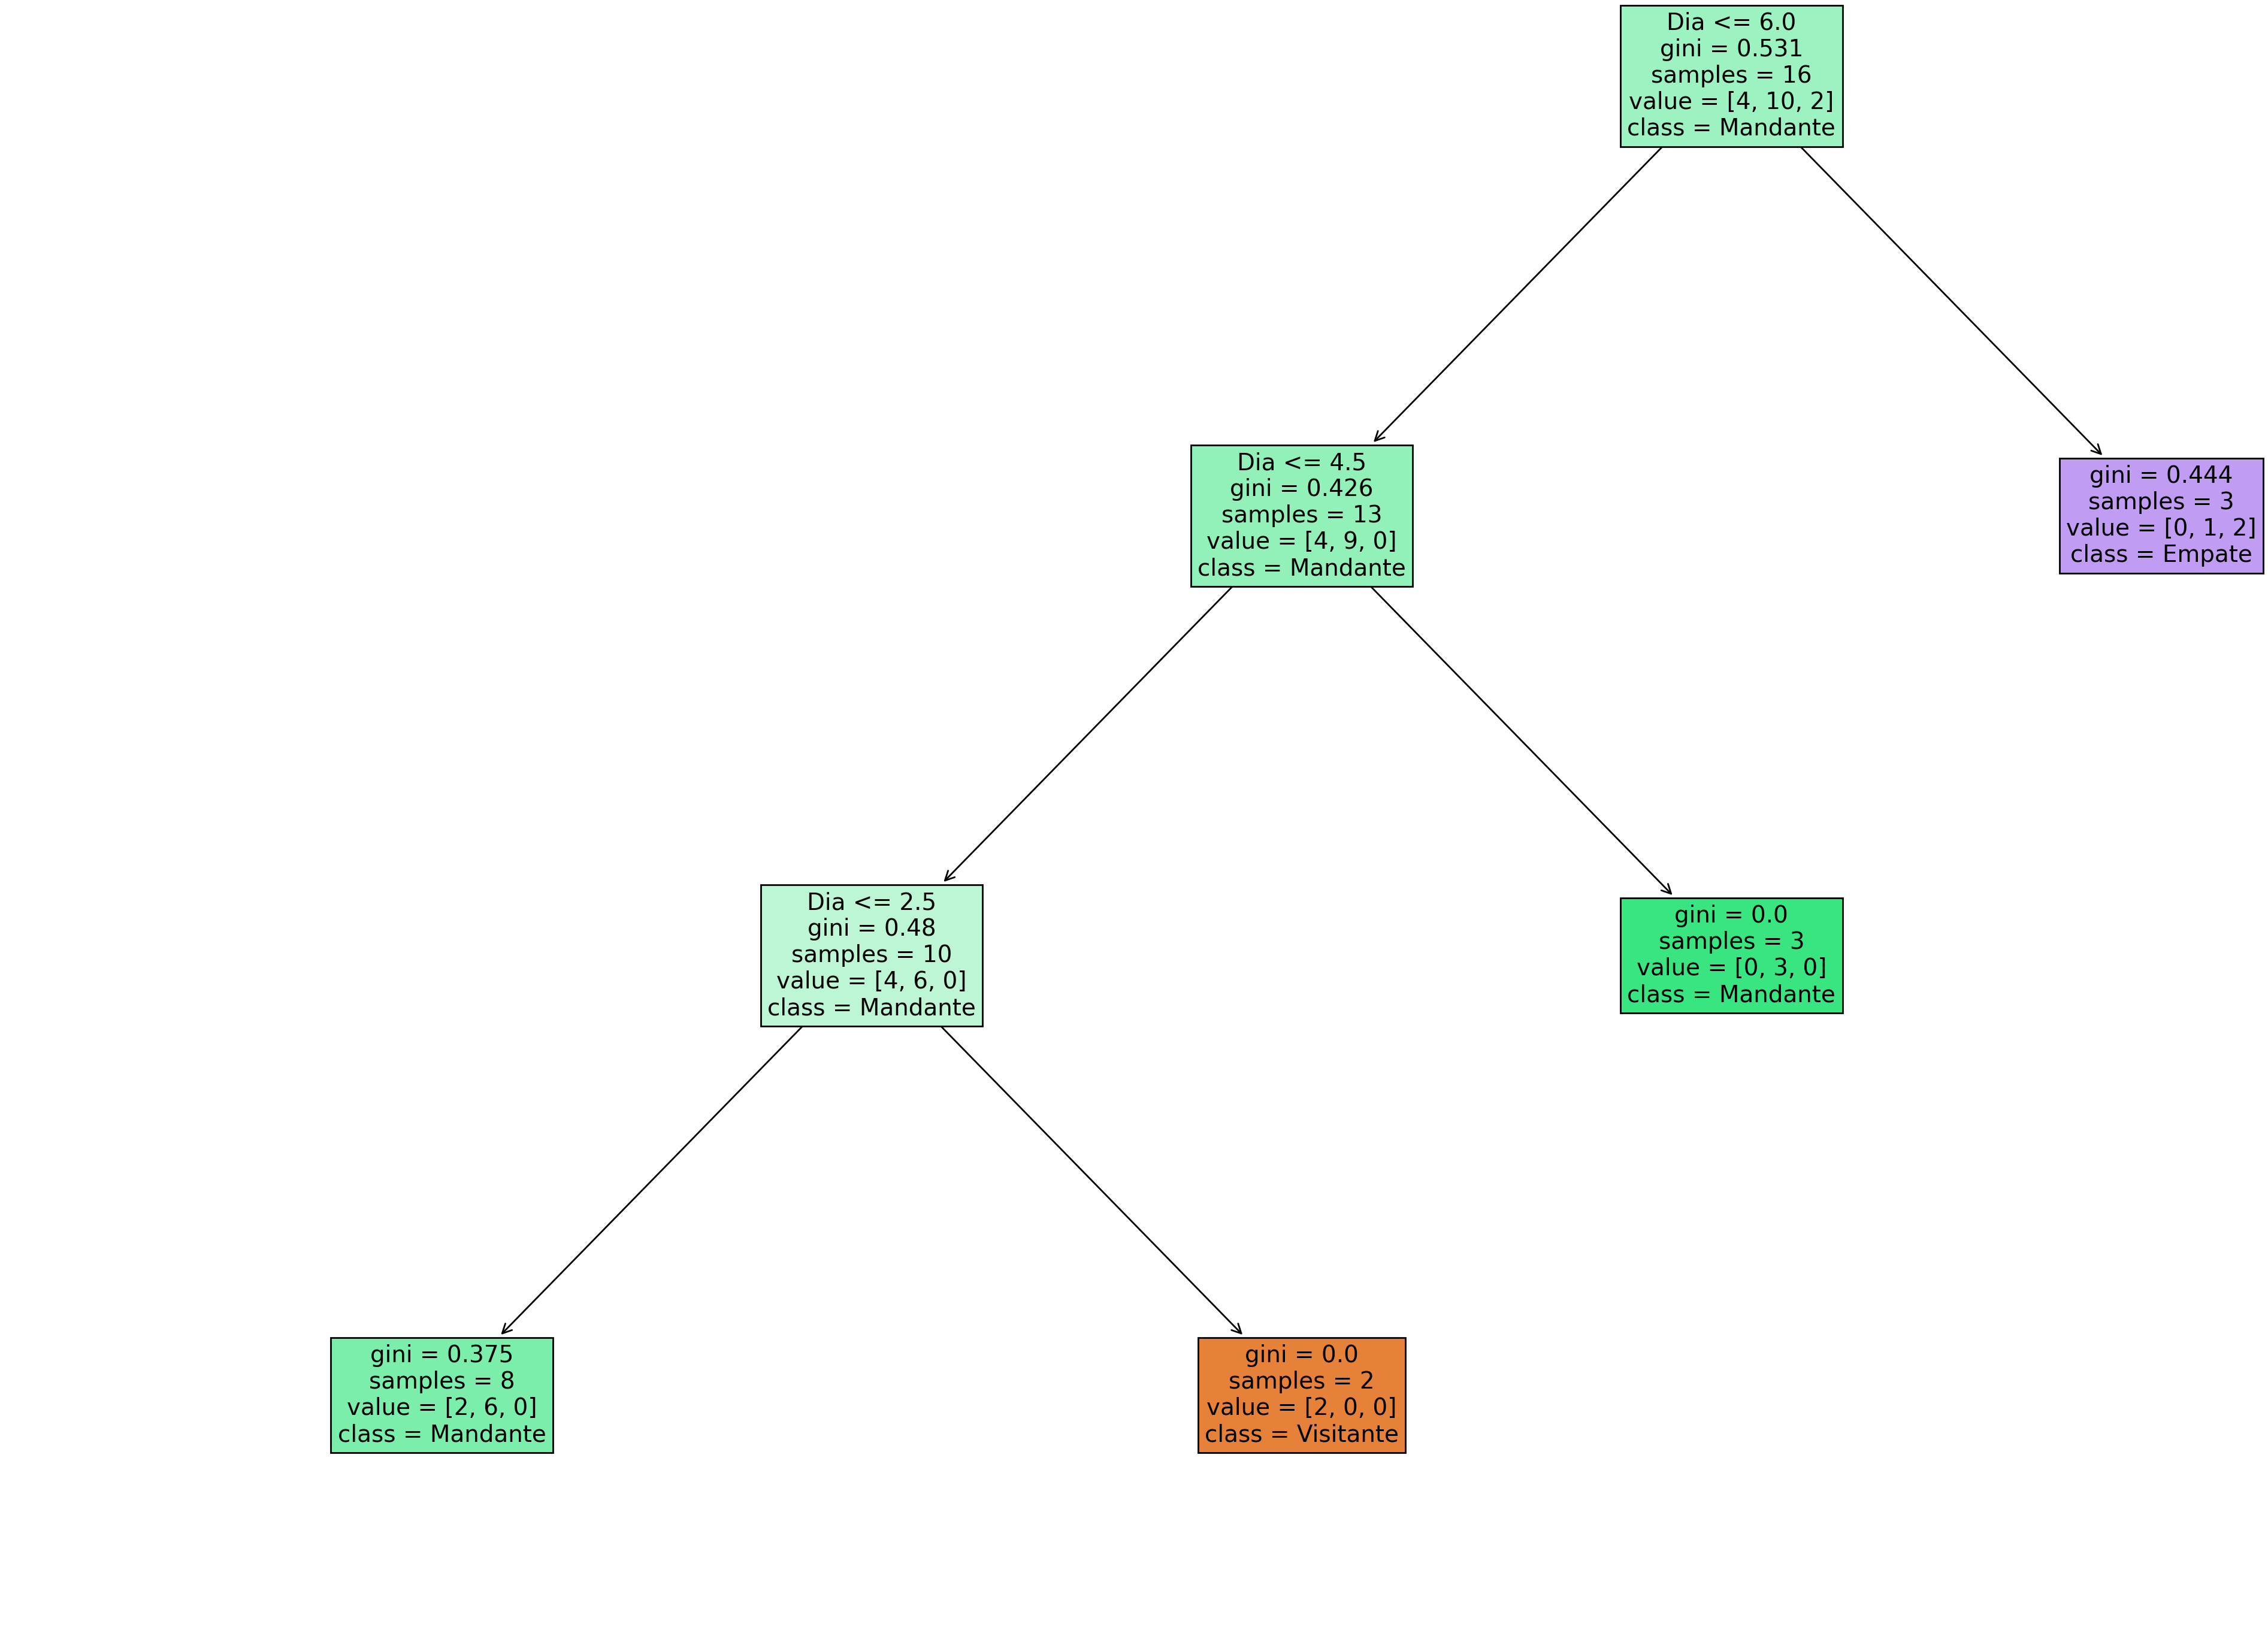

In [291]:
plt.figure(figsize=(10, 7), dpi=200)
tree.plot_tree(classificador, fontsize=14, filled=True,
 feature_names=caracteristicas,class_names=["Visitante", "Mandante", "Empate"], max_depth=3)
plt.show()